In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import  sympy as sym
import os.path as path
import wget

In [2]:
file = 'netwongregory.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

100% [....................................................................................] 41 / 41

In [3]:
Data = pd.read_csv(Path_,sep=',')

In [4]:
Data

,X,Y
0,0.0,-18
1,1.5,-13
2,2.0,0
3,3.8,5
4,4.2,3
5,5.9,10


In [5]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [6]:
def gregory_newton_interpolation(x, Y, x0):
    n = len(x)
    y= Y.copy()
    for i in range(1, n):
        for j in range(n - 1, i - 1, -1):
            y[j] = (y[j] - y[j - 1]) / (x[j] - x[j - i])
    p = y[n - 1]
    for i in range(n - 2, -1, -1):
        p = p * (x0 - x[i]) + y[i]
    return p
    
x= np.linspace(np.min(X), np.max(X),100)
y= gregory_newton_interpolation(X,Y,x)

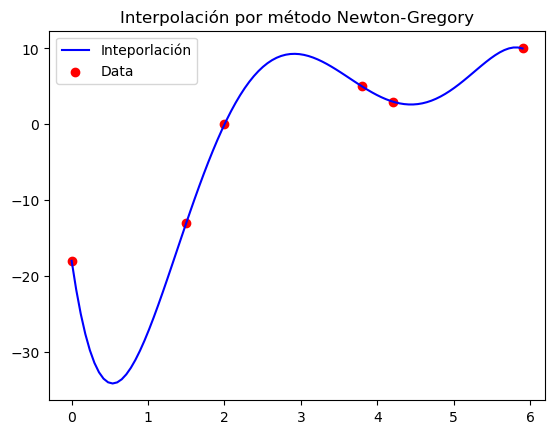

In [7]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(x,y, "b")
ax.scatter(X,Y, color="r")
ax.set_title("Interpolación por método Newton-Gregory")
ax.legend(["Inteporlación","Data"])
plt.show()

In [8]:
x= sym.Symbol("x", Real="True")
f=gregory_newton_interpolation(X,Y,x).expand()
f

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0